# 描述统计：单变量
<!-- scipy 包含计算统计量等基础函数 -->

In [2]:
import numpy as np
import scipy as sp
# scipy 包含计算统计量等基础函数 
# 设置精度
%precision 3


'%.3f'

In [3]:
# 单变量的数据操作
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

### 总和 & 样本容量

In [4]:
sp.sum(fish_data)
np.sum(fish_data)
len(fish_data)

ipykernel_launcher:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead


10

### 均值（期望值）

In [5]:
N = len(fish_data)
sum_value = sp.sum(fish_data)
expection = sum_value / N
expection

# 或者使用scipy中的mean函数
sp.mean(fish_data)

ipykernel_launcher:2: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
ipykernel_launcher:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


4.0

### 样本方差 & 无偏方差

In [6]:
sigma_2 = np.sum((fish_data - expection) ** 2) / N
sigma_2
np.var(fish_data, ddof = 0)
sigma = np.sum((fish_data - expection)  ** 2) / (N - 1)
np.var(fish_data, ddof = 1)

1.3333333333333333

### 标准差 & 标准化

In [7]:
sigma = np.sqrt(sigma_2)
np.std(fish_data, ddof=1)

1.1547005383792515

### 标准化
-   均值转换为0
-   标准差（方差）转化为1

In [8]:
fish_data - expection
sp.mean(fish_data - expection)
# 转换方差
fish_data / sigma
sp.std(fish_data / sigma, ddof = 1)

# 执行这两种转化，就可以转化数据
standard = (fish_data -  expection) / sigma
standard
sp.mean(standard)

ipykernel_launcher:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
ipykernel_launcher:5: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
ipykernel_launcher:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


2.2204460492503132e-17

## 其他统计量

In [9]:
# 最大值
sp.amax(fish_data)
# 最小值
sp.amin(fish_data)

# 中位数
sp.median(fish_data)

# 中位数相比较于极端值更具有稳健性


ipykernel_launcher:2: DeprecationWarning: scipy.amax is deprecated and will be removed in SciPy 2.0.0, use numpy.amax instead
ipykernel_launcher:4: DeprecationWarning: scipy.amin is deprecated and will be removed in SciPy 2.0.0, use numpy.amin instead
ipykernel_launcher:7: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead


4.0

## scipy.stats 与四分位数

In [10]:
from scipy import stats
fish_data_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
stats.scoreatpercentile(fish_data_3, 25)

2.75

#### 从小到大数，`75%`的位置

In [11]:
stats.scoreatpercentile(fish_data_3, 75)

6.25

# 多变量
## 整洁数据
根据哈德利·威科姆（Hadley Wickham)的定义：
-   每个单元格代表一个数值
-   每个变量一列
-   每项观察构成一行
-   每种类型的观察单元构成一个表格
### 列联表（交叉分类表）

In [12]:
import pandas as pd
import scipy as sp
%precision 3
fish_multi = pd.read_csv("./data/3-2-1-fish_multi.csv")
print(fish_multi)
# 求各组分的统计量
group = fish_multi.groupby("species")
print(group.mean())
# 求标准差
print(group.std(ddof=1))
# 整个的架构
group.describe()

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10
         length
species        
A             3
B             8
         length
species        
A           1.0
B           2.0


length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

### 列联表

In [13]:
shoes = pd.read_csv("./data/3-2-2-shoes.csv")
print(shoes)
cross = pd.pivot_table(
    data = shoes,         # 指定数据
    values = "sales",     # 指定统计的的对象
    aggfunc = "sum",      # 指定统计所用的函数
    index = "store",      # 行
    columns = 'color'     # 列
)
print(cross)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9
color  blue  red
store           
osaka    13    9
tokyo    10   15


### 协方差(Covariance)
研究两个连续变量之间的关系，与方差有一点点区别哟

In [14]:
import pandas as pd
import numpy as np
cov_data = pd.read_csv("./data/3-2-3-cov.csv")
print(cov_data)
# 读取数据的列
x = cov_data['x']
y = cov_data['y']
# 求样本容量
N = len(cov_data)
# 求各变量均值
mu_x = np.mean(x)
mu_y = np.mean(y)
print(mu_x, mu_y)
# 计算样本的协方差
cov_sample = sum((x - mu_x) * (y - mu_y)) / N
cov_sample
# 计算分母为N - 1的协方差矩阵
cov = sum((x - mu_x) * (y - mu_y)) / (N - 1)


      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49
21.020000000000003 42.7


### 协方差矩阵
使用 scipy / numpy 中的 cov函数可以便捷地计算协方差矩阵
> 把多个变量的方差和协方差形成的矩阵叫做协方差矩阵

In [15]:
sp.cov(x, y, ddof=0)
# 计算分母为N -1的协方差矩阵
sp.cov(x, y, ddof=1)

ipykernel_launcher:1: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
ipykernel_launcher:3: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead


array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

### 相关系数（皮尔逊矩相关系数）
一般是将协方差标准化成最大值为1，最小值为-1得出的
![avatar](./image/pierxun.png)

In [16]:
# 计算相关系数
sigma_2_x = np.var(x, ddof = 1)
sigma_2_y = np.var(y, ddof = 1)

# 计算相关系数
rho = cov / sp.sqrt(sigma_2_x * sigma_2_y)
print(rho)

# 计算两个变量的方差
sigma_2_x_sample = sp.var(x, ddof = 0)
sigma_2_y_sample = sp.var(y, ddof = 0)
# 计算相关系数
rho2 = cov_sample / sp.sqrt(sigma_2_x_sample * sigma_2_y_sample)
print(rho2)
sp.corrcoef(x, y)

0.7592719041137088
0.7592719041137087


ipykernel_launcher:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
ipykernel_launcher:10: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
ipykernel_launcher:11: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead
ipykernel_launcher:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
ipykernel_launcher:15: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead


array([[1.   , 0.759],
       [0.759, 1.   ]])

## 用python 模拟抽样

In [17]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 设置浮点数精度
%precision 3
# 在 Jupter Notebook 中显示图形
%matplotlib inline
fish_5 = np.array([2, 3, 4, 5, 6])
# 随机抽样,抽取的样本是随机变化的，所以每次都在变
np.random.choice(fish_5, size = 3, replace = False)

# 随机种子的使用
# 其实，我们所使用的随机数也是伪随机数
np.random.seed(1)
np.random.choice(fish_5, size = 3, replace = False)
np.mean(
    np.random.choice(fish_5, size = 3, replace = False)
)

4.0

### 放回取样、不放回取样

In [18]:
fish_10000 = pd.read_csv("./data/3-4-1-fish_length_100000.csv")["length"]
fish_10000.head()
len(fish_10000)
sampling_result = np.random.choice(
    fish_10000, size = 10, replace = False
)
sampling_result
sp.mean(sampling_result)

ipykernel_launcher:8: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


4.1544453909609675

### 总体分布

ipykernel_launcher:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
ipykernel_launcher:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
ipykernel_launcher:5: DeprecationWarning: scipy.var is deprecated and will be removed in SciPy 2.0.0, use numpy.var instead


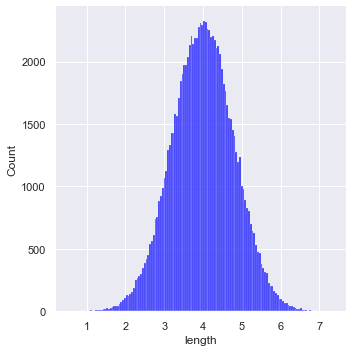

In [19]:
sp.mean(fish_10000)
# 标准差
sp.std(fish_10000, ddof = 0)
# 方差
sp.var(fish_10000, ddof = 0)
# 直方图
sns.displot(fish_10000, kde = False, color = 'blue')

### 总体分布的概率密度函数

C:\Users\Cherry\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


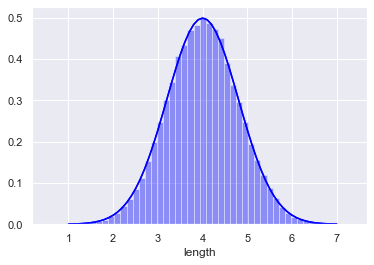

In [20]:
x = np.arange(start = 1, stop = 7.1, step = 0.1)
stats.norm.pdf(x = x, loc = 4, scale = 0.8)
plt.plot(x, 
        stats.norm.pdf(x = x, loc = 4, scale = 0.8),
        color = 'blue')
sns.distplot(fish_10000, kde = False,
        norm_hist= True, color = 'blue')
plt.plot(x,
        stats.norm.pdf(x = x, loc = 4, scale = 0.8),
        color = 'blue')

### 正态随机数

In [21]:
sampling_norm = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 10
)
sampling_norm
sp.mean(sampling_norm)

ipykernel_launcher:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


4.301401664573935

## 多次计算样本均值

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp

from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 设置打印精度
%precision 3
# 在jupyter Notebook 里示例图形
%matplotlib inline

population = stats.norm(loc = 4, scale = 0.8)
# decalre a 10000 array
sample_mean_array = np.zeros(10000)
# 将这10000 样本均值放入
np.random.seed(1)
for i in range(0, 10000):
    # Generate random numbers:
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)
sample_mean_array

In [ ]:
# 样本足够大时，均值以及标准差与总体接近

sp.mean(sample_mean_array)
sp.std(sample_mean_array)

sns.distplot(sample_mean_array, color='blue')

In [24]:
size_array = np.arange(
    start = 10, stop = 200100, step = 100)
size_array

# 样本均值的容器
sample_mean_array_size = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

# plt.plot(size_array, sample_mean_array_size
#             ,color = 'blue')
# plt.xlabel("Sample size")
# plt.ylabel("Sample mean")




ipykernel_launcher:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead


In [ ]:
population = stats.norm(loc = 4, scale = 0.8)
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[1] = sp.mean(sample)
    return (sample_mean_array)
population = stats.norm(loc = 4, scale = 0.8)
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial= 10000))


# 样本容量10
size_10  = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "Sample_mean":size_10,
    # copy 10000 "size 10"
    "size":np.tile("size 10", 10000)
})
# 样本容量20
size_20 = calc_sample_mean(size = 20, n_trial= 10000)
size_20_df = pd.DataFrame({
    "Sample_mean":size_20,
    "size":np.tile("size 20", 10000)
})
# 样本容量30
size_30 = calc_sample_mean(size = 30, n_trial= 10000)
size_30_df = pd.DataFrame({
    "Sample_mean":size_30,
    "size":     np.tile("size 30", 10000)
})
# 拼接表格
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df]
)
sim_result

# sns.violinplot(x = "size", y = "Sample_mean",
#                 data = sim_result, color='gray')

size_array = np.arange(
    start = 2, stop = 102, step = 2
)

sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size = size_array[i],
                                n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, ddof = 1)
plt.plot(size_array, sample_mean_std_array,
            color = 'blue')
plt.xlabel("Sample size")
plt.ylabel("mean_std value")




### 标准误差 (Standard Error, SE)

In [ ]:
# size_array = np.arange(
#     start = 2, stop = 102, step = 2
# )

# sample_mean_std_array = np.zeros(len(size_array))
# 标准误差
standard_error = 0.8 / np.sqrt(size_array)
plt.plot(size_array, sample_mean_std_array,
        color = 'blue')
plt.plot(size_array, standard_error,
        color = 'gray', linestyle = 'dotted')
plt.xlabel("Sample size")
plt.ylabel("mean_std value")

### 样本均值的方差偏离总体方差

In [ ]:
sample_var_array = np.zeros(10000)
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)
sp.mean(sample_var_array)

### 采用无偏方差消除方差

In [ ]:
# 用于存放无偏方差的空间
unbias_var_array = np.zeros(10000)
# 进行 10000 次"计算10个数据的无偏方差"的操作
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 0)
# 无偏方差的均值
sp.mean(unbias_var_array)

### 采用无偏方差消除偏离

In [33]:
# 用于存放无篇方差的空间
unbias_var_array = np.zeros(10000)
# 进行 10000 次 "计算10个数据的无偏方差"的操作
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 1)
# 无偏方差的均值
sp.mean(unbias_var_array)